# Make all PDF files to dataframe

In [ ]:
# my_roots_list//lippincottlibrary.wordpress.com/2020/02/05/python-find-files-with-os-walk/
import os
def list_files(filepath, filetype):
    paths = []
    roots = []
    path1 = []
    file1 = []
    path = ''
    for root, dirs, files in os.walk(filepath):
        for file in files:
            if file.lower().endswith(filetype.lower()) and os.path.isfile(os.path.join(root, file)):
                paths.append(os.path.join(root, file))
                roots.append(root)
                path = os.path.join(root, file)
                path1.append(path[path.find('\\',4,len(path)):])
                file1.append(file)
#                 print(os.path.isfile(os.path.join(root, file)),root,os.path.join(root, file),path[path.find('\\',4,len(path)):])
    return(roots,path1,paths,file1)

In [ ]:
my_roots_list,my_path_list,my_files_list,my_filenames_list = list_files('.\\2021', '.pdf')

In [ ]:
my_filenames_list

In [ ]:
import pandas as pd
file_df = pd.concat([pd.Series(my_files_list),pd.Series(my_roots_list),pd.Series(my_path_list),pd.Series(my_filenames_list)],axis=1)
file_df.columns = ['file','dir','path','file_name']

In [ ]:
file_df['name'] = file_df.file_name.str[:-4]

In [ ]:
file_df.head()

In [ ]:
for i in file_df.index[:10]:
    print(file_df.name[i])

In [ ]:
'.\images' + file_df.dir[1:3].str[1:]

In [ ]:
from PIL import Image 
Image.MAX_IMAGE_PIXELS = 1000000000
from pdf2image import convert_from_path
st = pd.Timestamp.now()
# file = './2021/ADU1/Unit 03/69-P-1-03-004-3-24.pdf'
# file = '2021113165430.PDF'
# pdfs = r"simple1.pdf"
for i in file_df.index:
    pdfs = file_df.file[i]
    pages = convert_from_path(pdfs, 350)
    j = 1
    for page in pages:
        image_name = '.\\images' + '\\' + file_df.name[i] + '_page'  + str(j) + '.jpg'
#         image_name = '.\\images' + file_df.dir[i][1:]+ '\\' + file_df.name[i] + '_page'  + str(j) + '.jpg'
#         image_name = './images' + file_df.dir[i].str[1:] + '/' + file_df.name[i] + '_page'  + str(j) + '.jpg'
        page.save(image_name, "JPEG")
        j += 1   
print(f'Time2SaveImages {pd.Timestamp.now()-st}')

In [1]:
#############################

In [ ]:
file_df.to_excel('file_df.xlsx')

In [ ]:
len(file_df)

In [ ]:
i

In [ ]:
from pdf2image import convert_from_path
st = pd.Timestamp.now()
# file = './2021/ADU1/Unit 03/69-P-1-03-004-3-24.pdf'
# file = '2021113165430.PDF'
# pdfs = r"simple1.pdf"
for i1 in range(i,len(file_df)+1):
    pdfs = file_df.file[i1]
    pages = convert_from_path(pdfs, 350)
    j = 1
    for page in pages:
        image_name = '.\\images' + '\\' + file_df.name[i1] + '_page'  + str(j) + '.jpg'
#         image_name = '.\\images' + file_df.dir[i][1:]+ '\\' + file_df.name[i] + '_page'  + str(j) + '.jpg'
#         image_name = './images' + file_df.dir[i].str[1:] + '/' + file_df.name[i] + '_page'  + str(j) + '.jpg'
        page.save(image_name, "JPEG")
        j += 1   
print(f'Time2SaveImages {pd.Timestamp.now()-st}')

In [ ]:
pdfs

In [ ]:
i1

In [ ]:
from pdf2image import convert_from_path
file = './2021/ADU1/Unit 03/69-P-1-03-004-3-24.pdf'
# file = '2021113165430.PDF'
# pdfs = r"simple1.pdf"
pdfs = file
pages = convert_from_path(pdfs, 350, poppler_path = r'D:\Setup\DataScience\poppler-21.11.0\Library\bin')

i = 1
for page in pages:
    image_name = "69-P-1-03-004-3-24_" + str(i) + ".jpg"  
    page.save(image_name, "JPEG")
    i = i+1   

In [ ]:
# img0 = cv2.imread('pid_1.jpg')
# img = img0.copy()
# df = pd.DataFrame()
# d = pytesseract.image_to_data(img, output_type=Output.DICT)
# n_boxes = len(d['level'])
# for i in range(n_boxes):
#     (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
# plt.imshow(img)
# # plt.imsave('box.jpg',img)
# # cv2.imshow('img', img)
# # cv2.waitKey(0)
# for i in range(n_boxes):
# #     l = []
#     (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     text = d['text'][i]
#     l = pd.Series([text, x, y, x+w, y+h])
#     df = df.append(l,ignore_index=True)
#     print(i,l)
# #     print(text, x, y, x+w, y+h)

In [ ]:
# !pip uninstall opencv-python 

In [ ]:
import cv2
cv2.__version__

# CV2 read Thai file name

In [74]:
# https://stackoverflow.com/questions/20831612/getting-the-bounding-box-of-the-recognized-words-using-python-tesseract
import pandas as pd
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from pytesseract import Output
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
# https://stackoverflow.com/a/43185606
# https://diewland.medium.com/python-cv2-%E0%B9%83%E0%B8%99-windows-%E0%B8%AD%E0%B9%88%E0%B8%B2%E0%B8%99%E0%B9%84%E0%B8%9F%E0%B8%A5%E0%B9%8C%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%84%E0%B8%A1%E0%B9%88%E0%B9%84%E0%B8%94%E0%B9%89-f688a4747070
import numpy as np
import cv2
def cv2_imread_win(img_filepath, np):
    with open(img_filepath, "rb") as stream:
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        return cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)

In [9]:
img_filepath = '.\\images\\เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg'

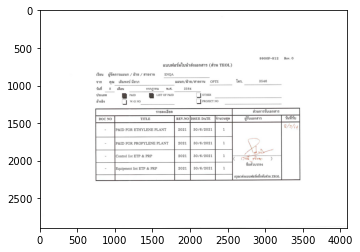

In [16]:
import matplotlib.pyplot as plt
plt.imshow(cv2_imread_win(img_filepath,np))

In [65]:
file = 'เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg'
print (f'.\\data_and_imagesmarked\\{file}')

.\data_and_imagesmarked\เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg


In [66]:
print(r'.\\data_and_imagesmarked\\'+file)

.\\data_and_imagesmarked\\เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg


In [67]:
marked_folder = r'.\\data_and_imagesmarked\\'
print(marked_folder+file)

.\\data_and_imagesmarked\\เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg


In [68]:
marked_folder = r'.\\data_and_imagesmarked\\'
def create_rectangle_dataframe(image,file,marked_folder):
#     img0 = cv2.imread(image)
    img0 = cv2_imread_win(image,np)
    img = img0.copy()
    df = pd.DataFrame()
    d = pytesseract.image_to_data(img, output_type=Output.DICT, config='--psm 12')
    n_boxes = len(d['level'])
    k = 0
    for i in range(n_boxes):
        l = []
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    #     text = d['text'][i]
        text = d['text'][i].replace('—','-').replace('~','-')
        if len(text.strip())>5 :
            k = k+1
            l = pd.Series([file, k, text, x, y, x+w, y+h])
            df = df.append(l,ignore_index=True)
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, '['+str(k)+']'+text, (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
    #         print(i,l.tolist())
#     plt.imshow(img)
#     plt.imsave('box_in_circle.jpg',img)
#     plt.imsave(f'.\\data_and_imagesmarked\\{file}',img)
    plt.imsave(marked_folder+file,img)
    return(df)
        #     print(text, x, y, x+w, y+h)

In [ ]:
# df = pd.DataFrame()
# for root, dirs, files in os.walk('.\\images'):
#         for file in files[:2]:
#             image = os.path.join(root, file)
#             df0 = create_rectangle_dataframe(image,file)
# #             df.append(df0)

In [3]:
df = pd.DataFrame()
for root, dirs, files in os.walk('.\\images'):
        for file in files:
            image = os.path.join(root, file)
            df0 = create_rectangle_dataframe(image,file)
            df = df.append(df0)
df.columns = ['file_name','id','text','x1','y1','x2','y2']

AttributeError: 'NoneType' object has no attribute 'copy'

In [21]:
df.columns = ['file_name','id','text','x1','y1','x2','y2']
df.to_excel('text_location.xlsx')

In [18]:
#####################################

In [77]:
file

'เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg'

In [78]:
image = '.\\images\\'+file
print(image)

.\images\เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg


In [79]:
df1 = create_rectangle_dataframe(image=image, file=file, marked_folder=r'.\\')

In [80]:
df1

,0,1,2,3,4,5,6
0,เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg,1.0,9900F-812,2920.0,627.0,3168.0,657.0
1,เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg,2.0,uuuWasNludidatanays,1637.0,698.0,2225.0,752.0
2,เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg,3.0,naanisunaun,909.0,845.0,1177.0,873.0
3,เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg,4.0,areaqy,1378.0,843.0,1526.0,871.0
4,เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg,5.0,Prerrerrerrrt,1648.0,883.0,1766.0,911.0
5,เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg,6.0,retiree,1774.0,883.0,1981.0,911.0
6,เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg,7.0,enenseesenseuseaseaserenaneennennennenneneenas...,1199.0,995.0,1785.0,1003.0
7,เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg,8.0,LANWNS,1049.0,943.0,1201.0,971.0
8,เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg,9.0,/aIsIIU,2027.0,926.0,2195.0,972.0
9,เอกสารเซ็นต์รับ ETP วันที่ 8.07.2564_page1.jpg,10.0,eererrerrrrrrrrrriiri,1190.0,1071.0,1383.0,1099.0


TypeError: Image data of dtype object cannot be converted to float

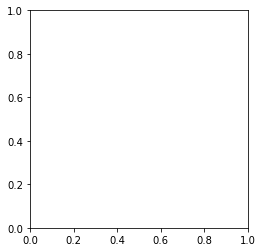

In [18]:
im = cv2.imread(image)
plt.imshow(im)

In [16]:
type(im)

NoneType

In [9]:
df0 = create_rectangle_dataframe(image,file)

AttributeError: 'NoneType' object has no attribute 'copy'

In [20]:
len(df)

832926

In [ ]:
import numpy as np
import cv2
img=cv2.imread('N:/OneDrive - IRPC/My IRPC Projects/Digital Transfomation/EM Digital Improvement/image2text/pid_1.jpg',1)    #changed image format to jpg
cv2.namedWindow('img',cv2.WINDOW_NORMAL)
cv2.Waitkey(10000)
cv2.imshow('cv2.WINDOW_NORMAL',img)
cv2.destoryAllWindows()

In [ ]:
img = cv2.imread("pid_1.jpg", cv2.IMREAD_GRAYSCALE)
src = cv2.cuda_GpuMat()
src.upload(img)

clahe = cv2.cuda.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
dst = clahe.apply(src, cv2.cuda_Stream.Null())

result = dst.download()

cv2.imshow("result", result)
cv2.waitKey(0)

In [ ]:
print(cv2.getBuildInformation())

In [ ]:
plt.imshow(img[:,:,::-1])

In [ ]:
cv2.rotate(img0,90)

In [ ]:
img0 = cv2.imread('69-P-1-03-004-3-24_1.jpg')
img = img0.copy()
df = pd.DataFrame()
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
# for i in range(n_boxes):
#     (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
# plt.imshow(img)
# plt.imsave('box.jpg',img)
# cv2.imshow('img', img)
# cv2.waitKey(0)
for i in range(n_boxes):
    l = []
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     text = d['text'][i]
    text = d['text'][i].replace('—','-').replace('~','-')
    if len(text.strip())>5 :
        l = pd.Series([text, x, y, x+w, y+h])
        df = df.append(l,ignore_index=True)
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, text, (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
#         print(i,l.tolist())
plt.imshow(img)
plt.imsave('box1.jpg',img)
#     print(text, x, y, x+w, y+h)

In [ ]:
import cv2
cv2.__version__

In [ ]:
print(cv2.getBuildInformation()) 

In [ ]:
 img1 = cv2.imread('box1.jpg')

 # show image

 cv2.imshow('box1.jpg',img1)
    
    
 cv2.waitKey(0)
 cv2.destroyAllWindows()

In [ ]:
img0 = cv2.imread('69-P-1-03-004-3-24_1.jpg')
img = img0.copy()
df = pd.DataFrame()
d = pytesseract.image_to_data(img, output_type=Output.DICT, config='--psm 12')
n_boxes = len(d['level'])
# for i in range(n_boxes):
#     (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
# plt.imshow(img)
# plt.imsave('box.jpg',img)
# cv2.imshow('img', img)
# cv2.waitKey(0)
k = 0
for i in range(n_boxes):
    l = []
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     text = d['text'][i]
    text = d['text'][i].replace('—','-').replace('~','-')
    if len(text.strip())>5 :
        k = k+1
        l = pd.Series([text, x, y, x+w, y+h])
        df = df.append(l,ignore_index=True)
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, '['+str(k)+']'+text, (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
#         print(i,l.tolist())
plt.imshow(img)
plt.imsave('box_in_circle.jpg',img)
#     print(text, x, y, x+w, y+h)

In [ ]:
d['text']

In [ ]:
img0 = cv2.imread('testimg.jpg')
img = img0.copy()
df = pd.DataFrame()
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
# for i in range(n_boxes):
#     (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
# plt.imshow(img)
# plt.imsave('box.jpg',img)
# cv2.imshow('img', img)
# cv2.waitKey(0)
for i in range(n_boxes):
    l = []
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     text = d['text'][i]
    text = d['text'][i].replace('—','-').replace('~','-')
    if len(text.strip())>5 :
        l = pd.Series([text, x, y, x+w, y+h])
        df = df.append(l,ignore_index=True)
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        print(i,l.tolist())
plt.imshow(img)
# plt.imsave('box.jpg',img)
#     print(text, x, y, x+w, y+h)

In [ ]:
img0 = cv2.imread('testimg.jpg')
img = img0.copy()
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
df = pd.DataFrame()
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
#     l = []
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#     text = d['text'][i]
    text = d['text'][i].replace('—','-').replace('~','-')
    if len(text.strip())>5 :
        l = pd.Series([text, x, y, x+w, y+h])
        df = df.append(l,ignore_index=True)
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        print(i,l.tolist())
plt.imshow(img)
# plt.imsave('box.jpg',img)
#     print(text, x, y, x+w, y+h)

In [ ]:
df.to_excel('text.xlsx')

In [ ]:
len(df)

In [ ]:
text = ' 12  -3 —5 '
len(text.strip())>5

In [ ]:
len(df)

In [ ]:
df.iloc[48]

In [ ]:
df.columns = ['text','x1','y1','x2','y2']
df.iloc[48]

In [ ]:
text = df[df.text.apply(lambda v: len(v)>5 )]

In [ ]:
chr(ord('—')+1)

In [ ]:
text1 = df[df.text.apply(lambda v: ((len(v.strip())>5 ))&(('-' in v)|('—' in v)))]
len(text1)

In [ ]:
text1.to_excel('text.xlsx',index=False)

In [ ]:
len(df.iloc[16].text)

In [ ]:
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    text = d['text'][i]
    print(text, x, y, w, h)
    

In [76]:
################################

# Lookup text to search on drawing

In [1]:
import pandas as pd
df = pd.read_excel('text_location.xlsx')

In [9]:
import matplotlib.pyplot as plt

In [2]:
lookup = '23P001C'
def find_text(lookup):
    return df[df.text.str.contains(lookup,na=False)]

In [3]:
find_text(lookup=lookup)

,Unnamed: 0,file_name,id,text,x1,y1,x2,y2
266426,90,19_08-P123001-3-AR2-Layout3-Layout1_page1.jpg,91,23P001C,1699,4334,1931,4378


In [4]:
find_text(lookup=lookup).x1.item()

1699

In [27]:
# https://betterprogramming.pub/highlighting-specific-word-in-an-input-image-1cf3d4f8ae27
# https://www.geeksforgeeks.org/python-opencv-cv2-arrowedline-method/
read_folder = r'./images/'
save_folder = r'./'
image = read_folder+find_text(lookup=lookup).file_name.item()
file = find_text(lookup=lookup).file_name.item()
x1 = find_text(lookup=lookup).x1.item()
x2 = find_text(lookup=lookup).x2.item()
y1 = find_text(lookup=lookup).y1.item()
y2 = find_text(lookup=lookup).y2.item()
# crop_text = cv2_imread_win(image,np)[y1:y2,x1:x2]
def find_drawing(image,file,saved_folder):
    img0 = cv2_imread_win(image,np)
    img = img0.copy()
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), -1)
#     cv2.putText(img, find_text(lookup=lookup).text.item(), (x1, y2),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
#     img[y1:y2,x1:x2] = crop_text
    alpha = 0.6  # Transparency factor.
    # Following line overlays transparent rectangle over the image
    img_new = cv2.addWeighted(img, alpha, img0, 1 - alpha, 0)
    img_new = cv2.arrowedLine(img_new, (x1-50,y1-50), (x1,y1),
                                     color=(0, 255, 0), thickness=9, tipLength = 0.5)
    plt.imsave(saved_folder+file,img_new)
    return(find_text(lookup=lookup))

In [28]:
find_drawing(image,file,save_folder)

,Unnamed: 0,file_name,id,text,x1,y1,x2,y2
266426,90,19_08-P123001-3-AR2-Layout3-Layout1_page1.jpg,91,23P001C,1699,4334,1931,4378


In [2]:
######################################

In [98]:
read_folder = r'./images/'
print(read_folder+find_text(lookup=lookup).file_name.values)

['./images/19_08-P123001-3-AR2-Layout3-Layout1_page1.jpg']


In [101]:
find_text(lookup=lookup).x1.values

array([1699], dtype=int64)